In [1]:
import sys
main_dir = '../'
main_dir2 = '../../OQSPlots'
sys.path.append(main_dir)
sys.path.append(main_dir2)

from functools import lru_cache

from qutip import piqs

import runs

import numpy as np
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
import tqdm

import matplotlib.pyplot as plt

import opennu as on
import gammas as ga

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

## Coherent emission

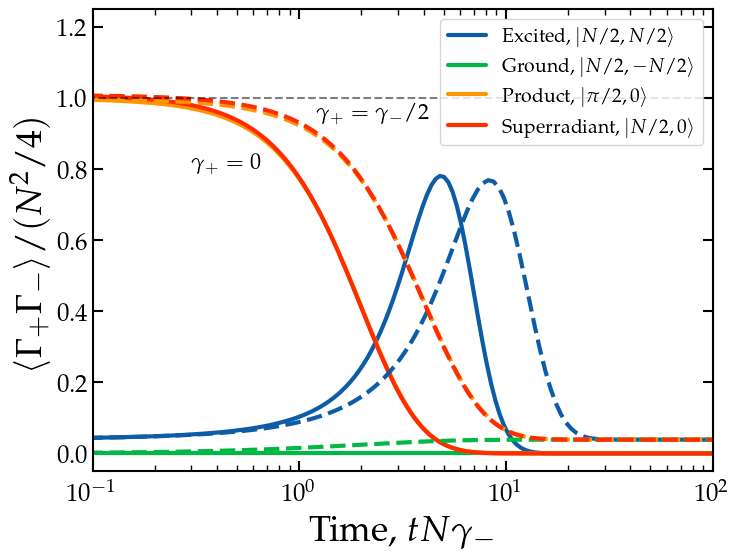

In [169]:
n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n


#(t, Jx, Jy, Jz, Jx^2, Jy^2, Jz^2, Jpm, Jmp, J)
dataP = np.loadtxt(path+f'/Product_RK4_h0.1_g0.00.txt')
dataE = np.loadtxt(path+f'/Excited_RK4_h0.1_g0.00.txt')
dataG = np.loadtxt(path+f'/Ground_RK4_h0.1_g0.00.txt')
dataD = np.loadtxt(path+f'/Dicke_RK4_h0.1_g0.00.txt')

dataP1 = np.loadtxt(path+f'/Product_RK4_h0.1_g0.50.txt')
dataE1 = np.loadtxt(path+f'/Excited_RK4_h0.1_g0.50.txt')
dataG1 = np.loadtxt(path+f'/Ground_RK4_h0.1_g0.50.txt')
dataD1 = np.loadtxt(path+f'/Dicke_RK4_h0.1_g0.50.txt')

Gmax = n*(n+1)/4

fig, ax = plt.subplots(1,1,figsize=(8,6))

plt.semilogx(dataE[:,0], dataE[:,7]/Gmax, label=r'Excited, $\vert N/2, N/2\rangle$')
plt.semilogx(dataG[:,0], dataG[:,7]/Gmax, label=r'Ground,  $\vert N/2, -N/2\rangle$')
plt.semilogx(dataP[:,0], dataP[:,7]/Gmax, label=r'Product, $\vert\pi/2, 0\rangle$')
plt.semilogx(dataD[:,0], dataD[:,7]/Gmax, label=r'Superradiant, $\vert N/2, 0\rangle$')


plt.semilogx(dataE1[:,0], dataE1[:,7]/Gmax, c='C0', ls='--')
plt.semilogx(dataG1[:,0], dataG1[:,7]/Gmax, c='C1', ls='--')
plt.semilogx(dataP1[:,0], dataP1[:,7]/Gmax, c='C2', ls='--')
plt.semilogx(dataD1[:,0], dataD1[:,7]/Gmax, c='C3', ls='--')

plt.plot(dataE1[:,0], dataE1[:,0]/dataE1[:,0], ls='--', c='k', alpha=0.5, lw=1.5)

plt.xlim(1e-1, 100)
plt.ylim(-0.05, 1.25)

plt.text(1.2, 0.94, '$\gamma_+=\gamma_-/2$', fontsize=16)
plt.text(0.3, 0.8, '$\gamma_+=0$', fontsize=16)


plt.xlabel(r'Time, $tN\gamma_-$', fontsize=26)
plt.ylabel(r'$\langle\Gamma_{+}\Gamma_-\rangle/(N^2/4)$', fontsize=26)
plt.legend(fontsize=14, frameon=True, loc=1)
plt.show()
fig.savefig(main_dir+'plots/num_1.pdf', bbox_inches='tight')

## Fast vs OpenNu vs qutip

## Runtime